In [1]:
import numpy as np
import pandas as pd
features=list()
with open('features.txt') as file:
    for line in file.readlines():
        features.append(line.split()[1])

len(features)

561

In [2]:
train=pd.read_csv(r'C:\Users\HP\Desktop\ML\Human-Activity-Recog\csv_files\train.csv')
test=pd.read_csv(r'C:\Users\HP\Desktop\ML\Human-Activity-Recog\csv_files\test.csv')

In [3]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [4]:
#Checking duplicated rows
print("Number of duplicated rows in train data: ",len(train[train.duplicated()]))
print("Number of duplicated rows in test data: ",len(test[test.duplicated()]))

Number of duplicated rows in train data:  0
Number of duplicated rows in test data:  0


In [5]:
print("Number of null values in train data: ",train.isnull().sum().sum())
print("Number of null values in test data: ",test.isnull().sum().sum())

Number of null values in train data:  0
Number of null values in test data:  0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
sns.countplot(x='subject',hue='ActivityName',data=train)
plt.show()

<Figure size 1600x800 with 1 Axes>

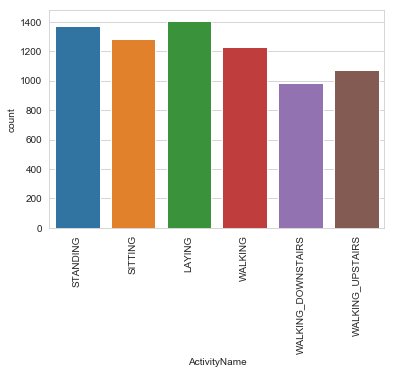

In [7]:
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

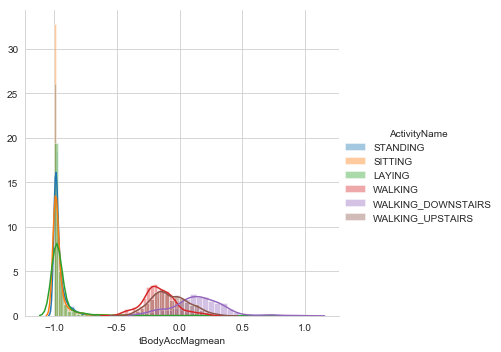

In [8]:
sns.FacetGrid(train,hue='ActivityName',height=5).map(sns.distplot,'tBodyAccMagmean').add_legend()
plt.show()

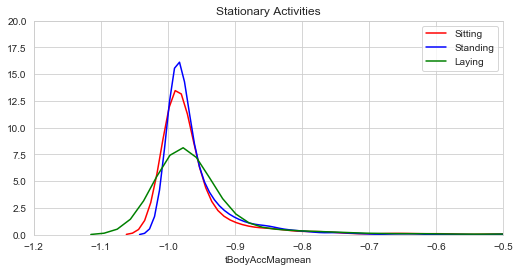

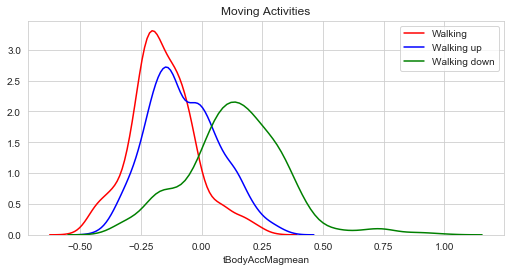

In [9]:
df1=train[train['Activity']==1]
df2=train[train['Activity']==2]
df3=train[train['Activity']==3]
df4=train[train['Activity']==4]
df5=train[train['Activity']==5]
df6=train[train['Activity']==6]
feature='tBodyAccMagmean'

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities')
sns.distplot(df4[feature],color='red',hist=False,label='Sitting')
sns.distplot(df5[feature],color='blue',hist=False,label='Standing')
sns.distplot(df6[feature],color='green',hist=False,label='Laying')
plt.legend()
plt.axis([-1.2,-0.5,0,20])
plt.tight_layout()

plt.figure(figsize=(14,7))
plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1[feature],color='red',hist=False,label='Walking')
sns.distplot(df2[feature],color='blue',hist=False,label='Walking up')
sns.distplot(df3[feature],color='green',hist=False,label='Walking down')
plt.legend()

plt.tight_layout()
plt.show()

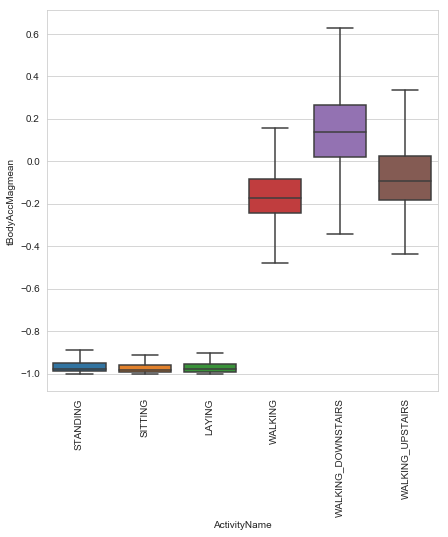

In [10]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName',y='tBodyAccMagmean',data=train,showfliers=False)
plt.xticks(rotation=90)
plt.show()

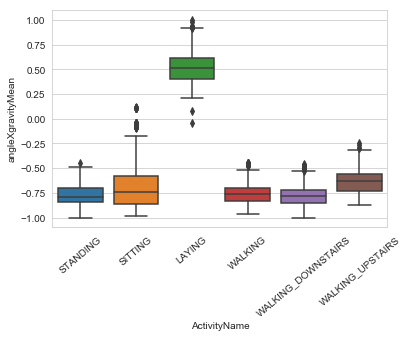

In [11]:
sns.boxplot(x='ActivityName',y='angleXgravityMean',data=train)
plt.xticks(rotation=40)
plt.show()

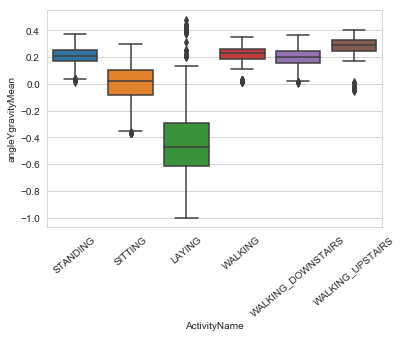

In [12]:
sns.boxplot(x='ActivityName',y='angleYgravityMean',data=train)
plt.xticks(rotation=40)
plt.show()

In [28]:
X_tsne=train.drop(['subject','ActivityName','Activity'],axis=1)
Y_tsne=train['Activity']

from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,perplexity=2).fit_transform(X_tsne)


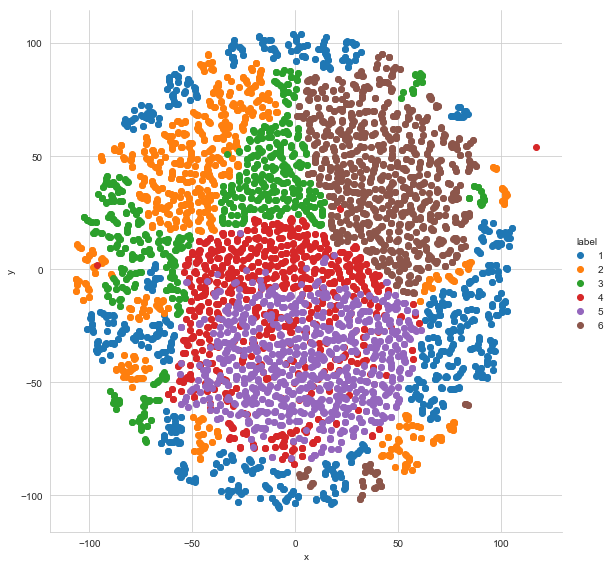

In [32]:
tsne_df=pd.DataFrame({'x':tsne[:,0],'y':tsne[:,1],'label':Y_tsne})
sns.FacetGrid(tsne_df,hue='label',height=8).map(plt.scatter,'x','y').add_legend()
plt.show()